# HW-Dataset을 위한 최적의 지도학습 모델 찾기에 대한 실습 및 연구

### 학번 : 1826078
### 이름 : 이철현

# # Data Preview / Visualization

Class 0 : 40
Class 1 : 20
Class 2 : 30
Class 3 : 8


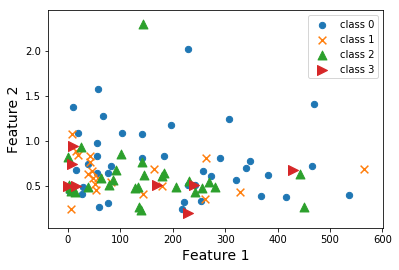

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.decomposition import PCA

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

y0 = data[data.Class == 0]
print("Class 0 : {0}".format(len(y0)))
y1 = data[data.Class == 1] 
print("Class 1 : {0}".format(len(y1)))
y2 = data[data.Class == 2] 
print("Class 2 : {0}".format(len(y2)))
y3 = data[data.Class == 3]
print("Class 3 : {0}".format(len(y3)))


markers = ['o','x','^','>']
sizes = [40,60,80,100]

for dot, n in zip([y0, y1, y2, y3], range(4)):
    x = dot['Feature 1']
    y = dot['Feature 2']
    plt.scatter(x, y, marker = markers[n], s= sizes[n])
    
plt.xlabel('Feature 1', fontsize = 14)
plt.ylabel('Feature 2', fontsize = 14)
plt.legend(['class 0', 'class 1', 'class 2', 'class 3'], loc='upper right')
plt.show()


# # Decision Tree

Requirement already up-to-date: imblearn in c:\users\chorong\appdata\roaming\python\python37\site-packages (0.0)


C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Model : Decision Tree
Max_depth : 16
Score : 0.775


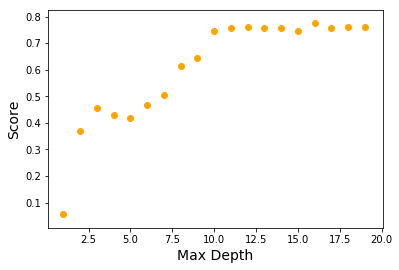

In [22]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# Decision Tree #

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

!pip install -U imblearn
from sklearn.decomposition import PCA
from imblearn.over_sampling import *
from imblearn.combine import *

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()
y = data.Class 

# 데이터 불균형을 잡아줄 Random Over Sampler #
X, y = RandomOverSampler(random_state = 0).fit_sample(X, y)

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)


# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

score_sum = 0

for alpha in range(1,20):
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels =  y_train 

        #========[ Model Module ]=====================#
        clf = tree.DecisionTreeClassifier(max_depth = alpha)
        clf = clf.fit(features, labels)
        #=======[ Score Aggregation ]=================#
        score_sum += clf.score(X_test, y_test)
    #======[ Score Check ]===========================#
    mean = score_sum / len(X)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    plt.scatter(alpha, mean, c = 'orange')
    
#__Print__Score__#
print("Model : Decision Tree")
print("Max_depth : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))
plt.xlabel('Max Depth', fontsize = 14)
plt.ylabel('Score', fontsize = 14)
plt.show()


# # KNN Algorithm ( Check )

# # KNN Algorithm

Requirement already up-to-date: imblearn in c:\users\chorong\appdata\roaming\python\python37\site-packages (0.0)


C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Model : KNN Algorithm
K value : 1
Score : 0.725


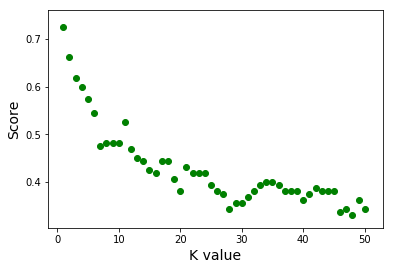

In [27]:

# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

!pip install -U imblearn
from sklearn.decomposition import PCA
from imblearn.over_sampling import *
from imblearn.combine import *
from sklearn.pipeline import make_pipeline

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()
y = data.Class 

# 데이터 불균형을 잡아줄 Random Over Sampler #
X, y = RandomOverSampler(random_state = 0).fit_sample(X, y)

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)


# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

score_sum = 0

for alpha in range(1,51):
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        knn = KNeighborsClassifier(n_neighbors = alpha) 
        knn.fit(features, labels)
        #=======[ Score Aggregation ]=================#
        score_sum += knn.score(X_test, y_test)
    
    #======[ Score Check ]===========================#
    mean = score_sum / len(X)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    plt.scatter(alpha, mean, c = 'green')
    
#__Print__Score__#
print("Model : KNN Algorithm")
print("K value : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))
plt.xlabel('K value', fontsize = 14)
plt.ylabel('Score', fontsize = 14)
plt.show()

# # SVM(RBF Kernel , Sigmoid Kernel)

Requirement already up-to-date: imblearn in c:\users\chorong\appdata\roaming\python\python37\site-packages (0.0)


C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Model : SVM - RBF
Gamma : 50
C value : 1 
Score : 0.84375
Model : SVM - Sigmoid
Gamma : 0.0001
C value : 100 
Score : 0.325


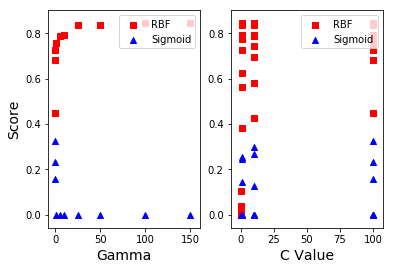

In [24]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

!pip install -U imblearn
from sklearn.decomposition import PCA
from imblearn.over_sampling import *
from imblearn.combine import *

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()
y = data.Class 

# 데이터 불균형을 잡아줄 Random Over Sampler #
from imblearn.combine import *
X, y = RandomOverSampler(random_state = 0).fit_sample(X, y)

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)

# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #

highest_score_rbf = 0
highest_alpha_rbf = 0
highest_beta_rbf = 0

highest_score_sigmoid = 0
highest_alpha_sigmoid = 0
highest_beta_sigmoid = 0

score_sum_rbf = 0
score_sum_sigmoid = 0

fig = plt.figure()
sub1 = fig.add_subplot(1,2,1)
sub2 = fig.add_subplot(1,2,2)

for alpha in [0.0001, 0.01, 0.1, 1, 5, 10, 25, 50, 100, 150]:
    for beta in [0.001, 0.01, 0.1, 1, 10, 100]:
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            #========[ Learning ]=========================#
            features = X_train 
            labels = y_train 

            #========[ Model Module ]=====================#
            svm_rbf = SVC(kernel='rbf', C=beta, gamma = alpha).fit(features, labels)
            svm_sigmoid = SVC(kernel='sigmoid', C=beta, gamma = alpha).fit(features, labels)

            #=======[ Score Aggregation ]=================#
            score_sum_rbf += svm_rbf.score(X_test, y_test)
            score_sum_sigmoid += svm_sigmoid.score(X_test, y_test)


        #======[ Score Check ]===========================#
        mean_rbf = score_sum_rbf / len(X)
        if(highest_score_rbf < mean_rbf):
            highest_score_rbf = mean_rbf
            highest_alpha_rbf = alpha
            highest_beta_rbf = beta

        mean_sigmoid = score_sum_sigmoid / len(X)
        if(highest_score_sigmoid < mean_sigmoid):
            highest_score_sigmoid = mean_sigmoid
            highest_alpha_sigmoid = alpha
            highest_beta_sigmoid = beta

        score_sum_rbf = 0
        score_sum_sigmoid = 0
        
        sub2.scatter(beta, mean_rbf, marker = 's', c = 'red')
        sub2.scatter(beta, mean_sigmoid, marker = '^', c = 'blue')
        
    sub1.scatter(alpha, mean_rbf, marker = 's', c = 'red')
    sub1.scatter(alpha, mean_sigmoid, marker = '^', c = 'blue')
    
#__Print__Score__#
print("=======================")
print("Model : SVM - RBF")
print("Gamma : {0}".format(highest_alpha_rbf))
print("C value : {0} ".format(highest_beta_rbf))
print("Score : {0:.6}".format(highest_score_rbf))

print("=======================")
print("Model : SVM - Sigmoid")
print("Gamma : {0}".format(highest_alpha_sigmoid))
print("C value : {0} ".format(highest_beta_sigmoid))
print("Score : {0:.6}".format(highest_score_sigmoid))

sub1.legend(['RBF','Sigmoid'], loc='upper right')
sub1.set_xlabel('Gamma', fontsize = 14)
sub1.set_ylabel('Score', fontsize = 14)

sub2.legend(['RBF','Sigmoid'], loc='upper right')
sub2.set_xlabel('C Value', fontsize = 14)

plt.show()

# # Logistic Regression

Requirement already up-to-date: imblearn in c:\users\chorong\appdata\roaming\python\python37\site-packages (0.0)


C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Model : Logistic Regression
C value : 100
Score : 0.2625


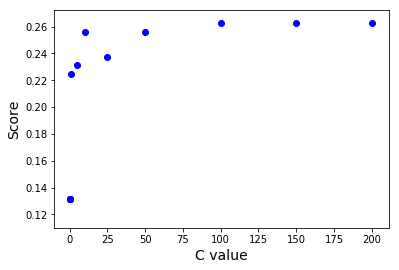

In [28]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

# - 사용할 기법 -
# 1. Decision Tree
# 2. KNN Algorithm
# 3. SVM ( RBF Kernel, Polynomial Kernel )
# 4. Random Forest
# 5. Ada boost

import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt

!pip install -U imblearn
from sklearn.decomposition import PCA
from imblearn.over_sampling import *
from imblearn.combine import *
#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()
y = data.Class 

# 데이터 불균형을 잡아줄 Random Over Sampler #
X, y = RandomOverSampler(random_state=0).fit_sample(X, y)
#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)

score_sum = 0

# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

for alpha in [0.0001, 0.01, 0.1, 1, 5, 10, 25, 50, 100, 150, 200]:
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        lr = LogisticRegression(C = alpha, solver='lbfgs', multi_class='multinomial', max_iter = 10000) 
        lr.fit(features, labels) 
        #=======[ Score Aggregation ]=================#
        score_sum += lr.score(X_test, y_test)
    
    #======[ Score Check ]===========================#
    mean = score_sum / len(X)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    plt.scatter(alpha, mean, marker = 'o', c = 'blue')
    
#__Print__Score__#
print("Model : Logistic Regression")
print("C value : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))
plt.xlabel('C value', fontsize = 14)
plt.ylabel('Score', fontsize = 14)
plt.show()

# # Random Forest

Requirement already up-to-date: imblearn in c:\users\chorong\appdata\roaming\python\python37\site-packages (0.0)


C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Model : Random Forest
Trees : 46
Score : 0.78125


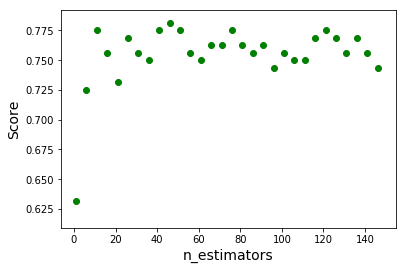

In [29]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


!pip install -U imblearn
from sklearn.decomposition import PCA
from imblearn.over_sampling import *
from imblearn.combine import *

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()
y = data.Class 

# 데이터 불균형을 잡아줄 Random Over Sampler #
X, y = RandomOverSampler(random_state=0).fit_sample(X, y)

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)


# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

score_sum = 0


for alpha in range(1,150,5):
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        forest = RandomForestClassifier(n_estimators=alpha) # How many Trees are in Forest
        forest = forest.fit(features, labels)
        #=======[ Score Aggregation ]=================#
        score_sum += forest.score(X_test, y_test)
    
    #======[ Score Check ]===========================#
    mean = score_sum / len(X)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    plt.scatter(alpha, mean, marker = 'o', c = 'green')
    
#__Print__Score__#
print("Model : Random Forest")
print("Trees : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))
plt.xlabel('n_estimators', fontsize = 14)
plt.ylabel('Score', fontsize = 14)
plt.show()

# # Nureal Network

Requirement already up-to-date: imblearn in c:\users\chorong\appdata\roaming\python\python37\site-packages (0.0)


C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Model : Nureal Network
alpha : 1
Layer : (3, 5)
Score : 0.3


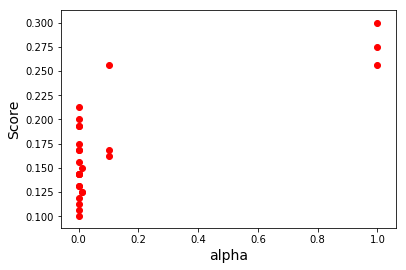

In [34]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

!pip install -U imblearn
from sklearn.decomposition import PCA
from imblearn.over_sampling import *
from imblearn.combine import *

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()
y = data.Class 

# 데이터 불균형을 잡아줄 Random Over Sampler #
X, y = RandomOverSampler(random_state=0).fit_sample(X, y)

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)


# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

score_sum = 0

for alpha in [1e-14, 1e-12, 1e-10, 1e-8, 1e-6,0.0001, 0.01, 0.1, 1]:
    for layer_size in [(3,5),(4,4),(5,3)]:
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]

            #========[ Learning ]=========================#
            features = X_train 
            labels = y_train 

            #========[ Model Module ]=====================#
            clf = MLPClassifier(solver='lbfgs', alpha= alpha ,hidden_layer_sizes=layer_size)
            clf = clf.fit(features, labels)
            #=======[ Score Aggregation ]=================#
            score_sum += clf.score(X_test, y_test)

        #======[ Score Check ]===========================#
        mean = score_sum / len(X)
        if(highest_score < mean):
            highest_score = mean
            highest_alpha = alpha
            highest_layer = layer_size
        score_sum = 0
        plt.scatter(alpha, mean, marker = 'o', c = 'red')
    
#__Print__Score__#
print("Model : Nureal Network")
print("alpha : {0}".format(highest_alpha))
print("Layer : {0}".format(highest_layer))
print("Score : {0:.6}".format(highest_score))
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('Score', fontsize = 14)
plt.show()

# # GaussianNB

In [33]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.model_selection import LeaveOneOut


!pip install -U imblearn
from sklearn.decomposition import PCA
from imblearn.over_sampling import *
from imblearn.combine import *

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()
y = data.Class 

# 데이터 불균형을 잡아줄 Random Over Sampler #
X, y = RandomOverSampler(random_state=0).fit_sample(X, y)

#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)


# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0

score_sum = 0


for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
        
    #========[ Learning ]=========================#
    features = X_train 
    labels = y_train 

    #========[ Model Module ]=====================#
    clf = GaussianNB()
    model_norm = clf.fit(features, labels)
    #=======[ Score Aggregation ]=================#
    score_sum += model_norm .score(X_test, y_test)
    
#======[ Score Check ]===========================#
mean = score_sum / len(X)
if(highest_score < mean):
    highest_score = mean
score_sum = 0
    
#__Print__Score__#
print("Model : GaussianNB")
print("Score : {0:.6}".format(highest_score))

Requirement already up-to-date: imblearn in c:\users\chorong\appdata\roaming\python\python37\site-packages (0.0)
Model : GaussianNB
Score : 0.20625


C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


# #Ada boost

Requirement already up-to-date: imblearn in c:\users\chorong\appdata\roaming\python\python37\site-packages (0.0)


C:\Users\ChoRong\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


Model : Ada Boost
n_estimators : 66
Score : 0.56875


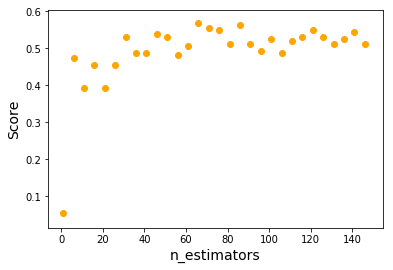

In [30]:
# 1. Data 셋 불러오기 -> Class 가 9인 경우 예외처리
# 2. Data 에서 Class 는 Label 로 Feature1 과 Feature2는 테스트 데이터로 만든다. [[[Feature1], [Feature2]],[[...]]]
# 3. Leave One Out 기법을 사용하여 Cross Vaildation 한다.

import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


!pip install -U imblearn
from sklearn.decomposition import PCA
from imblearn.over_sampling import *
from imblearn.combine import *

#__Data_PrePorcessing__#
# Class 가 9인 것들은 예외처리 하였다.
# Training Data = Feature들의 모임
# Label = Class

data = pd.read_excel('../HW1.xlsx')

data = data[data.Class != 9] 
data = data.reset_index(drop=True)

X = (data.loc[0:len(data),['Feature 1','Feature 2']]).as_matrix()
y = data.Class 

# 데이터 불균형을 잡아줄 Random Over Sampler #
X, y = RandomOverSampler(random_state=0).fit_sample(X, y)


#__Build_TrainingData_&_Lavels__#
# Leave One Out 기법을 사용하여 검증 데이터를 만든다. #

loo = LeaveOneOut()
loo.get_n_splits(X)


# 최적의 DecisionTree Depth를 찾기위한 For문과 최고점수와 그때의 Alpha값 #
highest_score = 0
highest_alpha = 0

score_sum = 0


for alpha in range(1,150,5):
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #========[ Learning ]=========================#
        features = X_train 
        labels = y_train 

        #========[ Model Module ]=====================#
        forest = AdaBoostClassifier(n_estimators=alpha, random_state=0)
        forest = forest.fit(features, labels)
        #=======[ Score Aggregation ]=================#
        score_sum += forest.score(X_test, y_test)
    
    #======[ Score Check ]===========================#
    mean = score_sum / len(X)
    if(highest_score < mean):
        highest_score = mean
        highest_alpha = alpha
    score_sum = 0
    plt.scatter(alpha, mean, marker = 'o', c = 'orange')
    
#__Print__Score__#
print("Model : Ada Boost")
print("n_estimators : {0}".format(highest_alpha))
print("Score : {0:.6}".format(highest_score))
plt.xlabel('n_estimators', fontsize = 14)
plt.ylabel('Score', fontsize = 14)
plt.show()

# # Result Graph

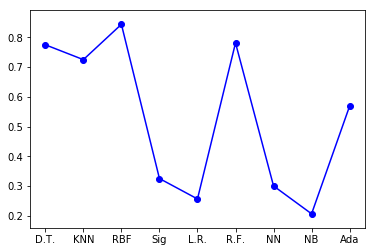

In [32]:
import matplotlib.pyplot as plt
X = ['D.T.', 'KNN','RBF', 'Sig', 'L.R.', 'R.F.', 'NN', 'NB', 'Ada']
Y = [0.775, 0.725, 0.84375, 0.325, 0.25625, 0.78125, 0.3, 0.20625, 0.56875]
plt.scatter(X, Y, c = 'blue')
plt.plot(X, Y,c = 'blue')
plt.show()